## automatic emittance meas

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")
    sys.path.append("../../")

run_dir = "/home/physics3/ml_tuning/20230825_LCLS_Injector/"
print(sys.path)

import os
os.environ["OMP_NUM_THREADS"] = str(6)

['/home/physics3/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization', '/usr/local/lcls/tools/python/toolbox', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python39.zip', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/lib-dynload', '', '/home/physics3/.local/lib/python3.9/site-packages', '/usr/local/lcls/package/anaconda/envs/rhel7_devel/lib/python3.9/site-packages', '../../../', '../../']


In [2]:
from scripts.image import ImageDiagnostic
import yaml

fname = "../../OTR3_config.yml"
image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
image_diagnostic.threshold = 10
image_diagnostic.background_file = "OTRS_IN20_621_background.npy"
print(image_diagnostic.yaml())

{screen_name: 'OTRS:IN20:621', array_data_suffix: IMAGE, array_n_cols_suffix: ROI_XNP,
  array_n_rows_suffix: ROI_YNP, resolution_suffix: RESOLUTION, resolution: 1.0, beam_shutter_pv: 'IOC:BSY0:MP01:MSHUTCTL',
  background_file: OTRS_IN20_621_background.npy, save_image_location: /home/physics3/ml_tuning/20230825_LCLS_Injector/,
  roi: null, min_log_intensity: 4.0, bounding_box_half_width: 3.0, wait_time: 0.1,
  n_fitting_restarts: 2, visualize: false, return_statistics: false, threshold: 10,
  testing: false}



In [3]:
#import matplotlib.pyplot as plt
#plt.imshow(image_diagnostic.measure_background())

{'Cx': 226.1113177898415,
 'Cy': 220.78954578273567,
 'Sx': 164.89869761345386,
 'Sy': 51.58400611970987,
 'bb_penalty': -167.73444385738364,
 'total_intensity': 28546.4,
 'log10_total_intensity': 4.455551346952618}

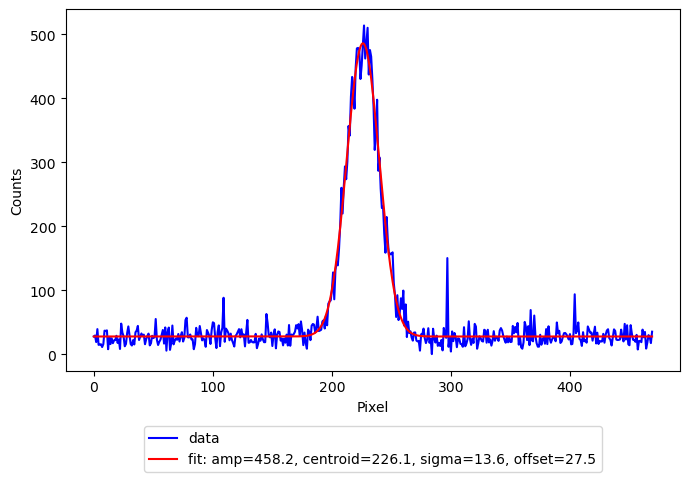

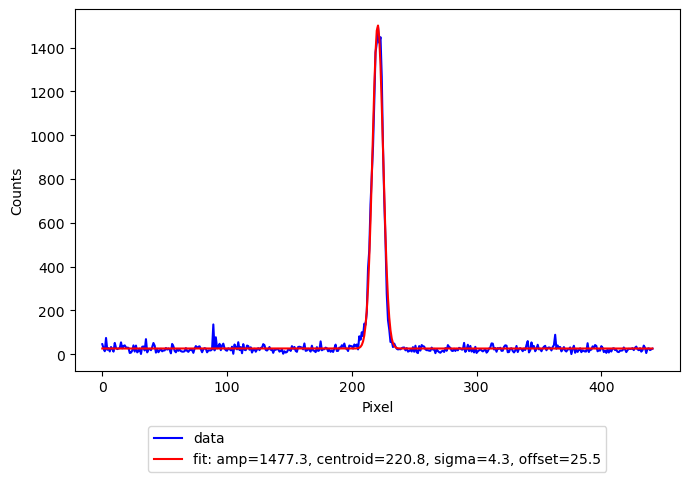

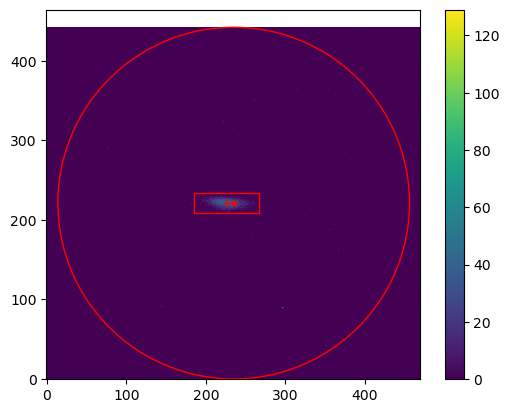

In [4]:
image_diagnostic.test_measurement()

In [5]:
from scripts.automatic_emittance import ScreenEmittanceMeasurement, BeamlineConfig

drift_length = 4.123114
beamline_config = BeamlineConfig(
    scan_quad_pv="QUAD:IN20:525:BCTRL",
    scan_quad_range=[-10.0, 7.0],
    scan_quad_length=0.1068,
    transport_matrix_x =[[1.0,    drift_length],
        [ 0.0,    1.0]],
    transport_matrix_y = [[1.0,    drift_length],
        [ 0.0,    1.0]],
    beam_energy=0.135,
    design_beta_x = 4.68280051,
    design_beta_y = 4.68872767,
    design_alpha_x = -1.79636538,
    design_alpha_y = -1.79814306
)


measurement = ScreenEmittanceMeasurement(
    image_diagnostic=image_diagnostic,
    beamline_config=beamline_config,
    run_dir=run_dir,
    wait_time=8.0,
    n_shots=10,
    n_iterations=5,
    visualize=2,
    turbo_length=1.0
)

measurement.dump_yaml()

In [6]:
measurement.x_measurement_vocs

VOCS(variables={'QUAD:IN20:525:BCTRL': [-10.0, 7.0]}, constraints={'bb_penalty': ['LESS_THAN', 0.0], 'log10_total_intensity': ['GREATER_THAN', 4.0]}, objectives={'S_x_mm': 'MINIMIZE'}, constants={}, observables=['S_x_mm', 'S_y_mm'])

sampling points for x emittance
CAPUT QUAD:IN20:525:BCTRL -3.5340895652770996
CAPUT QUAD:IN20:525:BCTRL 5.760285125690224
CAPUT QUAD:IN20:525:BCTRL -1.9962779467838185
CAPUT QUAD:IN20:525:BCTRL -2.827078342437744
CAPUT QUAD:IN20:525:BCTRL -3.0375800132751465
CAPUT QUAD:IN20:525:BCTRL -2.4261300563812256
CAPUT QUAD:IN20:525:BCTRL -3.1313371658325195
CAPUT QUAD:IN20:525:BCTRL -3.6696133613586426
0.17315458831618086
80
sampling points for y emittance
CAPUT QUAD:IN20:525:BCTRL -9.999990463256836
CAPUT QUAD:IN20:525:BCTRL -6.981543064117432
CAPUT QUAD:IN20:525:BCTRL -5.398807048797607
CAPUT QUAD:IN20:525:BCTRL -6.053007125854492
CAPUT QUAD:IN20:525:BCTRL -4.6450042724609375
0.051670631468823496
130


/home/physics3/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization/../../../scripts/characterize_emittance.py:621: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  k = torch.tensor(k, **tkwargs)
/home/physics3/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization/../../../scripts/characterize_emittance.py:622: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, **tkwargs)
/home/physics3/rroussel/SLAC_Xopt/lcls/emittance/emittance_optimization/../../../scripts/characterize_emittance.py:621: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(s

173.71886610984802


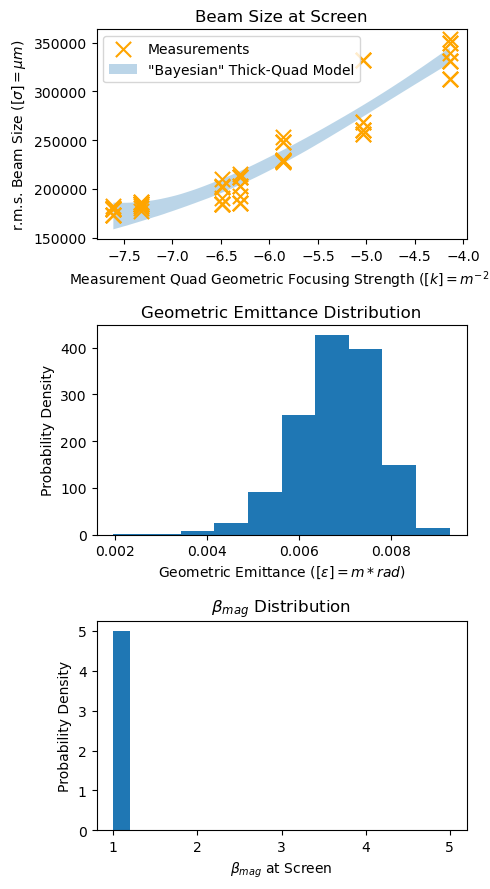

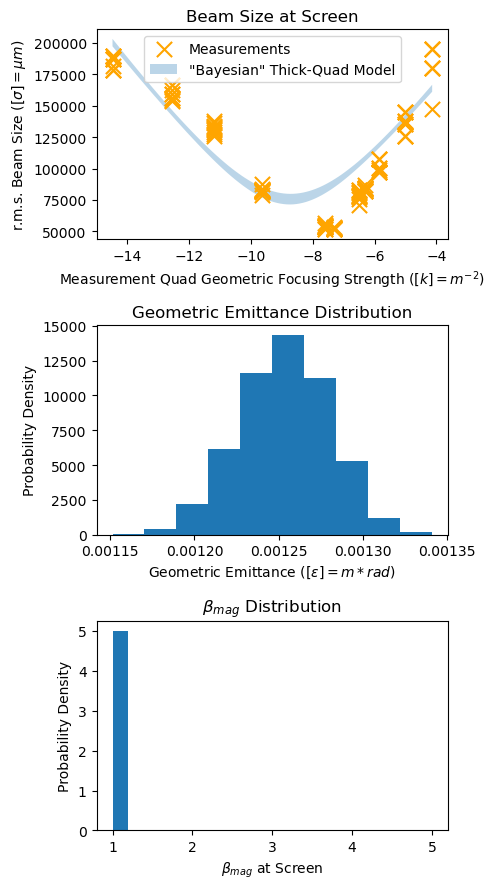

In [7]:
import time
start = time.time()
results, emit_x = measurement.run()
print(time.time() - start)

In [8]:
results

{'x_emittance': 1.8221060542622427,
 'x_emittance_05': 1.3941230193368024,
 'x_emittance_95': 2.1513463782556888,
 'x_emittance_var': 0.05455797497864144,
 'bmag_x_median': 1.0372100803525675,
 'y_emittance': 0.3312841490375935,
 'y_emittance_05': 0.3190236245377656,
 'y_emittance_95': 0.3424628891228856,
 'y_emittance_var': 5.028844132395848e-05,
 'bmag_y_median': 1.0632638015000324}

In [9]:
measurement.dump_file

'/home/physics3/ml_tuning/20230825_LCLS_Injector/emittance_characterize_1693002785.yml'

In [10]:
results["y_emittance_var"]**0.5

0.007091434362945093

<Axes: >

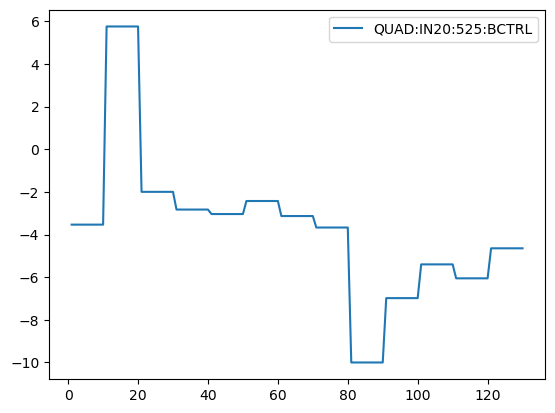

In [11]:
emit_x.data.plot(y="QUAD:IN20:525:BCTRL")

<Axes: xlabel='QUAD:IN20:525:BCTRL', ylabel='S_x_mm'>

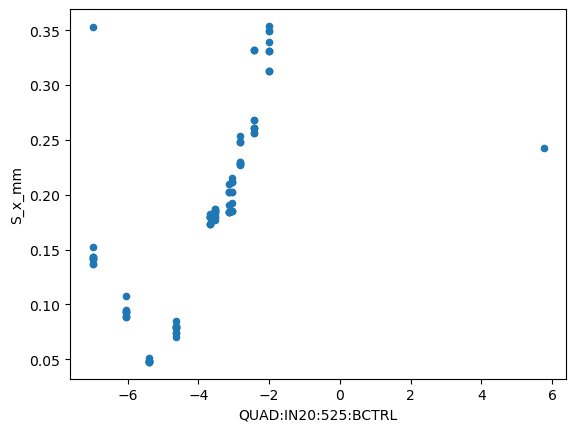

In [12]:
emit_x.data.plot.scatter(x="QUAD:IN20:525:BCTRL",y="S_x_mm")

<Axes: xlabel='QUAD:IN20:525:BCTRL', ylabel='S_y_mm'>

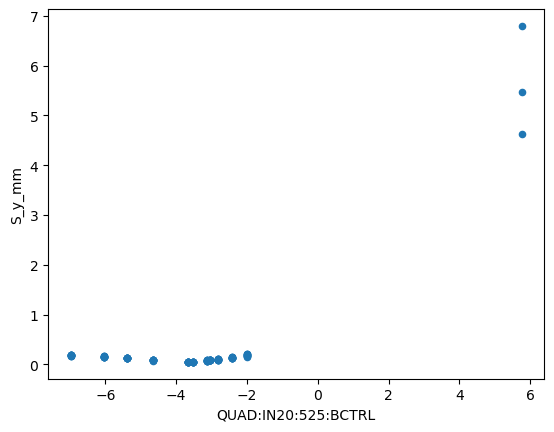

In [13]:
emit_x.data.plot.scatter(x="QUAD:IN20:525:BCTRL",y="S_y_mm")

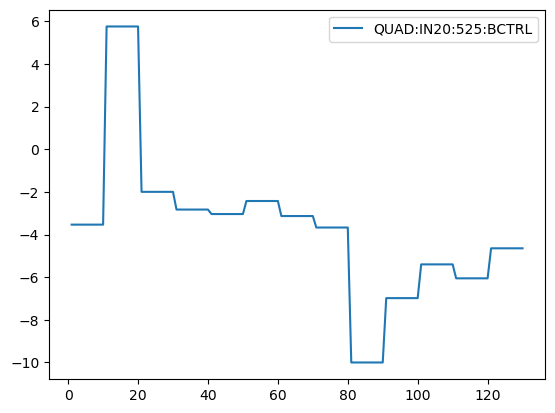

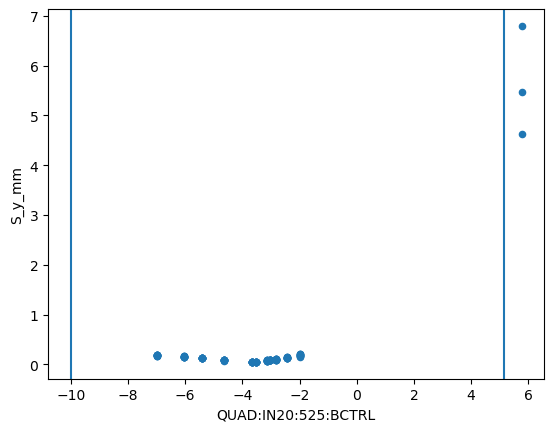

In [14]:
emit_x.data.plot(y="QUAD:IN20:525:BCTRL")
ax = emit_x.data.plot.scatter(x="QUAD:IN20:525:BCTRL", y="S_y_mm")
tr = emit_x.generator.turbo_controller.get_trust_region(
    emit_x.generator.model
).flatten()
for ele in tr:
    ax.axvline(ele)


In [15]:
emit_x.data

,QUAD:IN20:525:BCTRL,Cx,Cy,Sx,Sy,bb_penalty,total_intensity,log10_total_intensity,save_filename,S_x_mm,S_y_mm,total_size,xopt_runtime,xopt_error
1,-3.534090,227.01229,220.545179,184.397853,53.76558,-162.356467,28075.6,4.448329,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.184398,0.053766,192.076302,12.596844,False
2,-3.534090,227.080763,220.664771,176.927599,51.935086,-164.194996,28723.4,4.458236,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.176928,0.051935,184.392593,12.596844,False
3,-3.534090,227.144245,220.667011,182.378162,52.230031,-162.917589,28723.4,4.458236,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.182378,0.05223,189.7097,12.596844,False
4,-3.534090,226.219587,NaN,180.005383,NaN,NaN,28853.2,4.460194,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.180005,NaN,NaN,12.596844,False
5,-3.534090,226.219808,220.489197,180.008085,51.670631,-164.228552,28853.2,4.460194,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.180008,0.051671,187.27724,12.596844,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,-4.645004,235.924054,216.005574,79.558472,82.79794,-168.486217,33001.2,4.51853,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.079558,0.082798,114.82617,13.089571,False
127,-4.645004,238.317575,216.146893,70.415796,82.175228,-168.621559,33970.2,4.531098,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.070416,0.082175,108.218078,13.089571,False
128,-4.645004,238.325967,216.151595,74.366558,82.546985,-167.897566,33970.2,4.531098,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.074367,0.082547,111.105309,13.089571,False
129,-4.645004,238.282901,216.209563,74.065063,82.611638,-168.007772,33970.2,4.531098,/home/physics3/ml_tuning/20230825_LCLS_Injecto...,0.074065,0.082612,110.951865,13.089571,False
